# Loyality to the Institutions

We have been provided with two exit survey datasets for individuals who have left the Department of Education, Training and Employment (DETE) and the Technical and Further Educcation (TAFE) institute in Queensland, Australia. 

Using the two datasets, we are aiming to answer the two following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Due to the fact that these two datasets came from different institutions with different surveys and questions, our first goal is to combine the two into one dataset we can use to analyze the above two questions.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
mv_dete = dete_survey.isnull().sum()
mv_dete.sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

In [6]:
dete_survey['SeparationType'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [7]:
dete_survey['Dissatisfaction with the department'].value_counts(dropna=False)

False    761
True      61
Name: Dissatisfaction with the department, dtype: int64

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
mv_tafe = tafe_survey.isnull().sum()
mv_tafe.sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

In [11]:
tafe_survey[('Main Factor. Which of these was the ' 
             'main factor for leaving?')].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [12]:
drop_cols_dete = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns=drop_cols_dete, axis=1)

In [13]:
drop_cols_tafe = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns=drop_cols_tafe, axis=1)

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
mapper_cols_tafe = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }

tafe_survey_updated.rename(columns=mapper_cols_tafe, inplace=True)

In [17]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [18]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

In [21]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [23]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations.loc[:, 'cease_date'] = dete_resignations.loc[:, 'cease_date'].str.split('/').str.get(-1).astype(float)

In [26]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [27]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [28]:
quit_minus_start = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [29]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

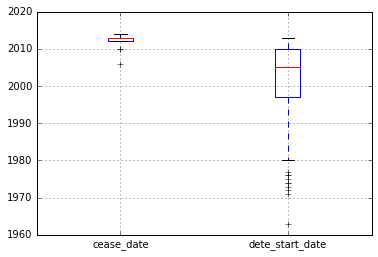

In [30]:
dete_resignations.boxplot(column=['cease_date', 'dete_start_date']);

In [31]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [32]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
def update_vals(val):
    
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [35]:
tafe_resignations['dissatisfied']\
    = tafe_resignations[['Contributing Factors. Dissatisfaction',
                      'Contributing Factors. Job Dissatisfaction']]\
      .applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [36]:
# tafe_resignations['dissatisfied']\
#     = tafe_resignations[['Contributing Factors. Dissatisfaction', 
#                        'Contributing Factors. Job Dissatisfaction']].any(axis=1)

In [37]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
job_dissatisfaction_cols = ['job_dissatisfaction', 
                            'dissatisfaction_with_the_department',
                            'physical_work_environment',
                            'lack_of_recognition',
                            'lack_of_job_security',
                            'work_location',
                            'employment_conditions',
                            'work_life_balance',
                            'workload']

In [39]:
dete_resignations['dissatisfied']\
    = dete_resignations[job_dissatisfaction_cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [40]:
dete_resignations_up['institute'] = 'DETE'

In [41]:
tafe_resignations_up['institute'] = 'TAFE'

In [42]:
combined = dete_resignations_up.merge(tafe_resignations_up, how='outer')

In [43]:
combined.shape

(651, 53)

In [44]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()

In [45]:
combined_updated.shape

(651, 10)

In [46]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [47]:
combined_updated['institute_service'] =\
    combined_updated['institute_service'].astype('str')\
                                         .str.replace('Less than 1 year', '1')\
                                         .str.replace('More than 20 years', '20')\
                                         .str.split('-').str.get(-1)\
                                         .astype('float')

In [48]:
combined_updated['institute_service'].value_counts(dropna=False).sort_index(ascending=False)

 49.0     1
 42.0     1
 41.0     1
 39.0     3
 38.0     1
 36.0     2
 35.0     1
 34.0     1
 33.0     1
 32.0     3
 31.0     1
 30.0     2
 29.0     1
 28.0     2
 27.0     1
 26.0     2
 25.0     2
 24.0     4
 23.0     4
 22.0     6
 21.0     3
 20.0    43
 19.0     3
 18.0     5
 17.0     6
 16.0     5
 15.0     7
 14.0     6
 13.0     8
 12.0     6
 11.0     4
 10.0    27
 9.0     14
 8.0      8
 7.0     13
 6.0     50
 5.0     23
 4.0     79
 3.0     20
 2.0     78
 1.0     95
 0.0     20
NaN      88
Name: institute_service, dtype: int64

In [49]:
def career_stage(year):
    
    if pd.isnull(year):
        return np.nan
    elif (year >= 0.0) & (year < 3.0):
        return 'New'
    elif (year >= 3.0) & (year < 7.0):
        return 'Experienced'
    elif (year >= 7.0) & (year < 11.0):
        return 'Established'
    else:
        return 'Veteran'

In [50]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

In [51]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [52]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [53]:
combined_updated['dissatisfied'].fillna(False, inplace=True)

In [54]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [86]:
pt = combined_updated.pivot_table(values='dissatisfied', c index='service_cat')
pt

ValueError: Grouper for 'dissatisfied' not 1-dimensional

In [81]:
%matplotlib inline

In [85]:
pt.plot(kind='bar', x='dissatisfied', )

KeyError: 'service_cat'

In [71]:
pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

,lab,val
0,A,10
1,B,30
2,C,20
